In [1]:
#### REMEMBER TO GIT PULL!  ####
#### Add this block to all jupyter files ####

#Loading and importing necessary tools. 
%load_ext autoreload 
%autoreload 2
import sys, os
sys.path.append("scripts")
import load_params as LP


# Comment and uncomment these two lines for when you are working on this notebook. 
#param_file = "param_files/ryo_local.csv"
param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
import sys
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import sys
import codecs
 
import random
random.seed(0)
from random import sample


import seaborn as sns
sns.set_style('whitegrid')

# guarantee unicode string
_u = lambda t: t.decode('UTF-8', 'replace') if isinstance(t, str) else t
_uu = lambda *tt: tuple(_u(t) for t in tt) 
# guarantee byte string in UTF8 encoding
_u8 = lambda t: t.encode('UTF-8', 'replace') if isinstance(t, unicode) else t
_uu8 = lambda *tt: tuple(_u8(t) for t in tt) 

In [25]:
###

import allstepslist as ASL

def run_perm_H1():
    numperm = 2
    outlist = list()

    for i in range(numperm):
      
        ASL.run_all_steps_H1(paramDict)
        run_RTC(paramDict)
        
        fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/rtc_results2.txt')
        fileIN.readline()
        genes = list()
        for j in fileIN:
            g = j.rstrip().split(" ")
            name = g[19]

            genes.append(name)
            outlist.append(str((genes)))
            #first = (j[0]) 
        
        fileIN.close()
    print((genes))                         
    fileOUT = open("RTCperm_H1" + str(numperm) + ".txt", "w")
    for k in outlist:
        fileOUT.write(k + "\n")       
    fileOUT.close()
run_perm_H1()

RUNNING
eqtl ['22_40397523_A_G_b37']
gwas ['22_40482260_T_A_b37']
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40397523 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
RUNNING
eqtl ['22_40496656_C_T_b37']
gwas ['22_40508511_T_A_b37']
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40419816 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
['0.930521']


In [27]:
####Use this to complete the iterations. This uses the step below that runs all steps
import allstepslist as ASL

def run_perm_H0():
    numperm = 10
    outlist = list()

    for i in range(numperm):
      
        ASL.run_all_steps_H0(paramDict)
        run_RTC(paramDict)
        
        fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/rtc_results2.txt')
        fileIN.readline()
        genes = list()
        for j in fileIN:
            g = j.rstrip().split(" ")
            name = g[19]

            genes.append(name)
            outlist.append(str((genes)))
            #first = (j[0]) 
        
        fileIN.close()
    print((genes))                         
    fileOUT = open("RTCperm_H0" + str(numperm) + ".txt", "w")
    for k in outlist:
        fileOUT.write(k + "\n")       
    fileOUT.close()
run_perm_H0()


eqtl ['22_40479811_G_A_b37']
gwas ['22_40448844_T_G_b37']
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40507282 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
eqtl ['22_40406462_A_G_b37']
gwas ['22_40420524_C_T_b37']
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40404116 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
eqtl ['22_40505972_A_G_b37']
gwas ['22_40511101_T_TC_b37']
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	

In [51]:
def run_real_eQTL():
    
    import os

    prep_real_GWAS("bestGWAS_var.txt")
    os.system("QTLtools rtc --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf.gz --bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile_realeQTL.bed.gz --hotspot /users/michaelbinkley/desktop/qtltools_test/hotspots.bed --gwas-cis /users/michaelbinkley/desktop/RTCstuffs/bestGWAS_var.txt /users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations_real.txt --normal --out rtc_results_realeQTL.txt")



run_real_eQTL()

In [13]:
#####This will be the iterative step, run this for a given eQTL, you pick the best GWAS and run it for H0
# The input eQTL is under /users/michaelbinkley/desktop/RTCstuffs/besteQTLs.txt

import os
import load_params as LP
import prepsteps as PS
import allstepsH as AS
import eqtl_funcs as EF
import gtex_funcs as GF
import deprecated_funcs as DF
#param_file = "param_files/ryo_local.csv"
param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

#this step works and takes ~2 min to run
def prep_step():
    #This step takes the given input eQTL from above and outputs the cold spot coordinates and the best GWAS
    PS.find_variant_coldspot('eQTLcoldspot.txt')
    PS.output_selected_coldspots('selectedcoldspots.txt')
    PS.find_variant_coldspot_gwas("gwasColdSpot.txt")    
    PS.sort_combined_gwas('sortedGWAS.txt')
    PS.output_header("bestGWAS.txt")    
    PS.output_selected_coldspots('preVCF.txt')
    PS.filter_vcf('filteredgenotype.txt')
#prep_step()

#This step is incredibly fast. No need to optimize.
def run_all_steps_H0(paramDict):  
    #This selects a 'random' eQTL and GWAS within the selected coldspot
    AS.select_rand_variant(paramDict["gtexDir"] + "eQTLcausal.txt", paramDict)
    AS.output_pos_rand_variant(paramDict["gtexDir"] + "eQTLcausalpos.txt", paramDict)  
    AS.select_rand_variant_gwas(paramDict["gtexDir"] + "GWAScausal.txt", paramDict)
    AS.output_pos_rand_variant_gwas(paramDict["gtexDir"] + "GWAScausalpos.txt", paramDict)
    
    #This identifies the linked eQTL
    os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy2.vcf --show-tags /users/michaelbinkley/desktop/GTEx/eQTLcausal.txt --tag-r2 0.5")
    AS.filter_genov_output(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)
    AS.filter_plink_output(paramDict["gtexDir"] + "filteredplink.txt", paramDict) 
    AS.select_rand_variant2(paramDict["gtexDir"] + "linkedeQTL.txt", paramDict)
    AS.output_pos_rand_variant2(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)   
    AS.prepare_perm_file( "/users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations.txt")
    
    #This now identifies the linked GWAS variant
    os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy2.vcf --show-tags /users/michaelbinkley/desktop/GTEx/GWAScausal.txt --tag-r2 0.5")
    AS.filter_plink_output_gwas(paramDict["gtexDir"] + "filteredplink.txt", paramDict)
    AS.select_rand_variant_gwas2(paramDict["gtexDir"] + "linkedGWAS.txt", paramDict)
    AS.output_pos_rand_variant_gwas2(paramDict["gtexDir"] + "linkedGWASpos.txt", paramDict)
#run_all_steps_H0(paramDict)

def run_all_steps_H1(paramDict):  
    #This selects a 'random' eQTL and GWAS within the selected coldspot
    print("RUNNING")
    AS.select_rand_variant(paramDict["gtexDir"] + "eQTLcausal.txt", paramDict)
    AS.output_pos_rand_variant(paramDict["gtexDir"] + "eQTLcausalpos.txt", paramDict)  
    AS.select_rand_variant_gwas(paramDict["gtexDir"] + "GWAScausal.txt", paramDict)
    AS.output_pos_rand_variant_gwas(paramDict["gtexDir"] + "GWAScausalpos.txt", paramDict)
    
    #This identifies the linked eQTL
    os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy2.vcf --show-tags /users/michaelbinkley/desktop/GTEx/eQTLcausal.txt --tag-r2 0.5")
    AS.filter_genov_output(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)
    AS.filter_plink_output(paramDict["gtexDir"] + "filteredplink.txt", paramDict) 
    AS.select_rand_variant2(paramDict["gtexDir"] + "linkedeQTL.txt", paramDict)
    AS.output_pos_rand_variant2(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)   
    AS.prepare_perm_file( "/users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations.txt")
    
    #This now identifies the linked GWAS variant
    #os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy.vcf --show-tags /users/michaelbinkley/desktop/GTEx/GWAScausal.txt --tag-r2 0.5")
    AS.filter_plink_output_gwas(paramDict["gtexDir"] + "filteredplink.txt", paramDict)
    AS.select_rand_variant_gwas2(paramDict["gtexDir"] + "linkedGWAS.txt", paramDict)
    AS.output_pos_rand_variant_gwas2(paramDict["gtexDir"] + "linkedGWASpos.txt", paramDict)
#run_all_steps_H1(paramDict)

RUNNING
eqtl ['22_40473354_C_T_b37']
gwas ['22_40514102_G_A_b37']


In [22]:
###Leave more blank space
  
geneName = "ENSG00000172404.4"

def run_RTC(paramDict):
    ### RUn this for the real eQTL
    import load_params as LP
    import eqtl_funcs as EF
    import allstepsH as AS
    
    geneName = "ENSG00000172404.4"
    chrNum = "22"
    pos = "40407887"
    tissue = "Breast_Mammary_Tissue"

    slope, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  


    
    def calculate_pp(slope_r, intercept, residuals, chrNum, pos, indivVector, paramDict):
 
        permutedResiduals = random.sample(list(residuals), len(residuals))
        genoVector, indivGenoVector = GF.get_dos_vector(chrNum, pos, paramDict["vcfDir"])
        filteredGenoVector, indivVector = GF.filter_and_sort_genotype_vector(genoVector, indivGenoVector, indivVector)
        pp = float(slope_r)*np.array(filteredGenoVector) + permutedResiduals + intercept   
        return pp



   # random.seed(0)

    param_file = "param_files/binkley_local.csv" 

    paramDict = LP.load_param_file(param_file)

    geneName = "ENSG00000172404.4"
    chrNum = "22"
    pos = "40407887"
    tissue = "Breast_Mammary_Tissue"

    #print(pos)
    slope_r, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  


    chrNumLinked = "22"
    ### THIS is the position of the randomly selected
    #posLinked = output_pos_rand_variant(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)
    posLinked = AS.output_pos_rand_variant2(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)

    #print("position", posLinked, posLinked[0])
    posLinked = posLinked[0]

    pp = calculate_pp(slope_r, intercept, residuals, chrNumLinked, posLinked, indivVector, paramDict)


    def output_bed(indivVector, expVector, filepath, geneName, paramDict):
        selected = AS.output_gene_info(geneName, paramDict)
        header = AS.output_header2(indivVector)
        with open(filepath, 'w') as outfile:
            outfile.write(header + "\n")
            geneLocation = selected
            outfile.write("\t".join([str(x) for x in geneLocation]) + "\t" + "\t".join([str(x) for x in expVector]) + "\n")
    #print(geneName)        
    AS.output_bed(indivVector, pp, paramDict["tmpSmall"] + "/GTExExpfile.bed", geneName, paramDict)


    #This prepares the index files for the pseudophenotype
    os.system("bgzip /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed")
    os.system("tabix -p bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz")
    #This calculates the RTC score
    os.system("QTLtools rtc --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf.gz --bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz --hotspot /users/michaelbinkley/desktop/qtltools_test/hotspots.bed --gwas-cis /users/michaelbinkley/desktop/GTEx/linkedGWAS.txt /users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations.txt --normal --out rtc_results2.txt")

run_RTC(paramDict)

	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
	Getting dosage vector for : 22 40473354 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok


In [2]:
# import custom functions
import deprecated_funcs as DF


In [3]:
# Potentially deprecated functions. 
# import custom functions
import deprecated_funcs as DF
#param_file = "param_files/ryo_local.csv"
param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

DF.output_coldspot('coldspotlist.txt', paramDict)
DF.extract_best_eqtl(paramDict)

0
['ENSG00000227232.4', '1', 969773.0, 'rs115170833', 0.00394194]
['ENSG00000238009.2', '1', 739117.0, 'rs140206562', 0.00910401]
['ENSG00000233750.3', '1', 860792.0, 'rs200244572', 0.00106124]
['ENSG00000237683.5', '1', 669533.0, 'rs61769343', 0.000469019]
['ENSG00000239906.1', '1', 918573.0, 'rs2341354', 0.00058299]
['ENSG00000241860.2', '1', 770085.0, 'rs150344285', 0.00168939]
['ENSG00000228463.4', '1', 566875.0, 'rs2185539', 4.43778e-05]
['ENSG00000237094.7', '1', 1125954.0, 'rs182941513', 0.00273658]
['ENSG00000233653.3', '1', 1280492.0, 'rs113543280', 5.94016e-05]
['ENSG00000225972.1', '1', 1137210.0, '.', 3.19683e-06]
['ENSG00000225630.1', '1', 1343461.0, 'rs111873504', 0.000820046]
['ENSG00000237973.1', '1', 1137191.0, 'rs192669137', 1.59308e-06]
['ENSG00000229344.1', '1', 1110586.0, 'rs9442387', 0.000215156]
['ENSG00000240409.1', '1', 1185309.0, 'rs190252762', 9.46014e-05]
['ENSG00000248527.1', '1', 1125954.0, 'rs182941513', 0.000216301]
['ENSG00000198744.5', '1', 906272.0, '

In [4]:
def ID_hotspots(outfilename): 
    fileIN = open(paramDict["gtexDir"] + 'coldspots.txt')
    hotspots = list()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')

        
        Chr = i[0]
        for num in i[0]: #Get rid of "chr in the file"
            if num in "chr":
                Chr = Chr.replace(num, '')       
        start = int(i[1])
        end = int(i[2])
        middle = str(i[3])
        bound = str(i[4])

        hotspots.append([Chr, start, end, middle, bound])
        #hotspots.append(start)
        #hotspots.append(end)
        #hotspots.append(middle)
        fileOUT.write(Chr + "\t" + str(start) + "\t" + str(end) + "\t" + str(middle)  +  "\t" + str(bound) + "\n")
    fileIN.close()
    fileOUT.close()
    return hotspots
ID_hotspots('coldspots2.txt')



[['1', 1020078, 1031078, '1025578', '1872839'],
 ['1', 1872839, 1881839, '1877339', '2031839'],
 ['1', 2031839, 2035839, '2033839', '2141839'],
 ['1', 2141839, 2147839, '2144839', '2214839'],
 ['1', 2214839, 2221839, '2218339', '2299839'],
 ['1', 2299839, 2303839, '2301839', '2322839'],
 ['1', 2322839, 2326839, '2324839', '2338839'],
 ['1', 2338839, 2357839, '2348339', '2362839'],
 ['1', 2362839, 2369839, '2366339', '2403839'],
 ['1', 2403839, 2408839, '2406339', '2747844'],
 ['1', 2747844, 2756844, '2752344', '2798844'],
 ['1', 2798844, 2806844, '2802844', '2877844'],
 ['1', 2877844, 2880844, '2879344', '2894844'],
 ['1', 2894844, 2898844, '2896844', '3004844'],
 ['1', 3004844, 3019844, '3012344', '3054844'],
 ['1', 3054844, 3072844, '3063844', '3108844'],
 ['1', 3108844, 3112844, '3110844', '3112844'],
 ['1', 3112844, 3118844, '3115844', '3148844'],
 ['1', 3148844, 3151844, '3150344', '3163844'],
 ['1', 3163844, 3168844, '3166344', '3263844'],
 ['1', 3263844, 3276844, '3270344', '332

In [12]:
def ID_hotspots(outfilename): 
    fileIN = open(paramDict["gtexDir"] + 'coldspots.txt')
    hotspots = list()
    #fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')

        
        Chr = i[0]
        for num in i[0]: #Get rid of "chr in the file"
            if num in "chr":
                Chr = Chr.replace(num, '')       
        start = int(i[1])
        end = int(i[2])
        middle = str(i[3])
        bound = str(i[4])

        hotspots.append([Chr, start, end, middle, bound])
        #hotspots.append(start)
        #hotspots.append(end)
        #hotspots.append(middle)
        #fileOUT.write(Chr + "\t" + str(start) + "\t" + str(end) + "\t" + str(middle)  +  "\t" + str(bound) + "\n")
    
    fileIN.close()
    #fileOUT.close()
    return hotspots
#ID_hotspots('coldspots2.txt')


#####OUtputs cold spot for given eqtl
def find_variant_coldspot(outfilename):
    fileIN = open( "/users/michaelbinkley/desktop/RTCstuffs/tmpSmall/besteQTLs.txt" )
    
    #fileOUT = open(outfilename, "w")
    hotspots = ID_hotspots('coldspots2.txt')
    eQTLhotspot = list()


    for i in fileIN:
        
        i = i.rstrip().split('\t')
        gene = str(i[0])
        chrnum = str(i[1])
        snp = (i[3])
        position = float(i[2])
        pvalue = float(i[4])
        
        for  Chr, start, end, middle, bound in hotspots:
            if Chr  != chrnum :
                continue
            else: 
                if position < float(bound) and position > float(end): 
                    #distance = abs(position - middle)
                    eQTLhotspot.append([Chr, end, bound])
                    #fileOUT.write("\t".join([ str(Chr), str(start), str(end), str(middle), str(bound) , gene, snp, str(position), str(pvalue)] ) + "\n")
                else: 
                    continue
    return eQTLhotspot
    
    fileIN.close()
    #fileOUT.close()

find_variant_coldspot('eQTLcoldspot.txt')

#### This step can probably be truncated 
def output_selected_coldspots(outfilename):
    fileIN = open ('eQTLcoldspot.txt')
    
    fileOUT = open(outfilename, "w")
    selectedcoldspots = list()
    
    for i in fileIN:
        
        i = i.rstrip().split('\t')
        Chr = str(i[0])
        end = str(i[2])
        bound = str(i[4])
        
    

        fileOUT.write("\t".join([ str(Chr),  str(end),  str(bound)] ) + "\n")
        selectedcoldspots.append([ str(Chr),  str(end),  str(bound)])                    
    
    fileIN.close()
    fileOUT.close()
    return selectedcoldspots
#output_selected_coldspots('selectedcoldspots.txt')




In [13]:
###THis outputs a file with GWAS variants in our cold spots of interest that colocalize. it will output the best GWAS
## first step takes 2 min to run
def find_variant_coldspot_gwas(outfilename):
    fileIN = open('/users/michaelbinkley/desktop/GTEx/GWAS_RP.txt')
    fileIN.readline()
    fileOUT = open(outfilename, "w")

    cspots = find_variant_coldspot('eQTLcoldspot.txt')
    #cspots = output_selected_coldspots('selectedcoldspots.txt')
    GWAScoldspots = list()
    print(cspots)
    for i in fileIN:
        
        i = i.rstrip().split('\t')
        gene = str(i[0])
        chrnum = str(i[2])
        #snp = (i[3])
        position = float(i[3])
        pvalue = float(i[9])
        if pvalue!=0:
            for  (Chr), (end), (bound) in cspots:
                if Chr  != chrnum:
                    continue
                else: 
                    if position < float(bound) and position > float(end): 
                    #distance = abs(position - middle)
                        GWAScoldspots.append([Chr, end, bound, gene, position, pvalue])
                        #fileOUT.write("\t".join([ str(Chr), str(end),  str(bound) , gene, str(position), str(pvalue)] ) + "\n")
                    else: 
                        continue
    return GWAScoldspots
    fileIN.close()
    #fileOUT.close()
find_variant_coldspot_gwas("gwasColdSpot.txt")

def sort_combined_gwas(outfilename):
    #fileIN = open("gwasColdSpot.txt")
    GWAScoldspots = find_variant_coldspot_gwas("gwasColdSpot.txt")
    sortedData = list()
    fileOUT = open(outfilename, "w")
    #for i in fileIN:
    sortedlist = list()
    for i in GWAScoldspots:
        #i=i.rstrip().split("\t")
        i =[i[0], (i[1]), (i[2]), (i[3]), (i[4]), float(i[5])]
        sortedData.append( [(i[0]), (i[1]), (i[2]), i[3], (i[4]), (i[5])])
    sortedScoreData = sorted(sortedData, key = lambda x : (x[5]), reverse=False) #Sort by the element in the column index 
    
    for i in sortedScoreData:
        #print(i)
        #sortedlist.append([(i[0]), (i[1]), (i[2]), i[3], (i[4]), (i[5])])
        fileOUT.write("\t".join([str(x) for x in i]) + "\n")
    return sortedlist
    #return [x[0] for x in sortedScoreData]
    fileOUT.close()
    fileIN.close()
#sort_combined_gwas('sortedGWAS.txt')


### This outputs the best GWAS for a given coldspot
def output_header(outfilename):
    print(outfilename)
    fileIN = open('sortedGWAS.txt')
    fileOUT = open(outfilename, "w")

    fileOUT.write(fileIN.readline() + "\n")
    #return list
    fileOUT.close()
    fileIN.close()
#output_header("bestGWAS.txt")


def prep_real_GWAS(outfilename):
    fileIN = open("bestGWAS.txt")

    fileOUT = open(outfilename, "w")

    for i in fileIN:
        #i = i[0]
        
        i=i.rstrip().split("\t")
        if len(i)<6: continue
        print(i)
        varG = str(i[3]) 

        fileOUT.write(str(varG) + "_b37" + "\t" + "Cancer"  )

    fileOUT.close()
    fileIN.close()
#prep_real_GWAS("bestGWAS_var.txt")


[['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 2147839, '2214839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 2035839, '2141839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 1031078, '1872839'], ['1', 2303839, '2322839'], 

In [7]:
#####This step outputs the selected cold spot
def output_selected_coldspots(outfilename):
    #fileIN = open ('selectedcoldspots.txt')
    coldspots = find_variant_coldspot('eQTLcoldspot.txt')
    fileOUT = open(outfilename, "w")
    selectedcoldspots2 = list()
    
    for i in coldspots:
        
        i = i.rstrip().split('\t')
        Chr = str(i[0])
        end = float(i[1])
        bound = float(i[2])
        selectedcoldspots2.append([ (Chr),  (end),  (bound)])              
    

        fileOUT.write("\t".join([ str(Chr),  str(end),  str(bound)] ) + "\n")
              
    
    fileIN.close()
    fileOUT.close()
    return selectedcoldspots2
#output_selected_coldspots('preVCF.txt')



In [29]:
#####This step has many readlines, it outputs all variants in the cold spot

def filter_vcf(outfilename): 
    fileIN = open(paramDict["gtexDir"] +'/chr22_subset_gtex_copy2.vcf')
    
    #selectedcoldspots2 = output_selected_coldspots('preVCF.txt')
    selectedcoldspots2 = find_variant_coldspot('eQTLcoldspot.txt')
    fileOUT = open(outfilename, "w")
    
    for i in fileIN:
        if i[0]=="#": continue
        i = i.rstrip().split('\t')
        if i[1]=="POS":
            continue      
        chrnum = str(i[0])
        #print(i[1])
        position = float(i[1])


        for  Chr, end, bound in selectedcoldspots2:
            if (Chr)  == chrnum:
                if position > float(end)  and position < float(bound):  

                    fileOUT.write("\t".join([str(x) for x in i] ) + "\n")                    
                else: 
                    continue
      
    fileIN.close()
    fileOUT.close()
#filter_vcf('filteredgenotype.txt')


In [9]:
######This step randomly picks an eQTL in the coldspot and the position

def select_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[2])

   # seed = random.randrange(sys.maxsize)
   # rng = random.Random(seed)
    rand = sample(rnd[0:],1)


 #   print("Seed was:", seed)
   # print(rnd[0:])
    print("eqtl", rand)
    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")

    fileOUT.close()
    fileIN.close()
    return rand
#select_rand_variant(paramDict["gtexDir"] + "eQTLcausal.txt", paramDict)

def output_pos_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'eQTLcausal.txt')
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            break
    fileOUT.close()
    fileIN.close()
#output_pos_rand_variant(paramDict["gtexDir"] + "eQTLcausalpos.txt", paramDict)    

In [10]:
#####This step randomly picks a GWAScausal in the coldspot

def select_rand_variant_gwas(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[2])
    rand = sample(rnd[0:],1)
    print("gwas", rand)
    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")
    fileOUT.close()
    fileIN.close()
#select_rand_variant(paramDict["gtexDir"] + "GWAScausal.txt")

def output_pos_rand_variant_gwas(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'GWAScausal.txt')
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            break
    fileOUT.close()
    fileIN.close()
#output_pos_rand_variant(paramDict["gtexDir"] + "GWAScausalpos.txt", paramDict)    


In [79]:
import os

os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy2.vcf --show-tags /users/michaelbinkley/desktop/GTEx/eQTLcausal.txt --tag-r2 0.5")

0

In [9]:
import os

os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex_copy2.vcf --show-tags /users/michaelbinkley/desktop/GTEx/GWAScausal.txt --tag-r2 0.5")

0

In [12]:
### This will be the GWAS to run the RTC score 
###This will be the eQTL to run the RTC score 
#### THIS IS NOW FIXED, it will output randomly linked variant that is within the cold spot

def filter_genov_output_gwas(outfilename, paramDict):
    fileIN = open('filteredgenotype.txt')
    #fileOUT = open(outfilename, "w")
    pos = list()
    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])  
        pos.append(SNP)
        #fileOUT.write(str(SNP) + "\n")

    #fileOUT.close()
    fileIN.close()
    return pos
#filter_genov_output_gwas(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)

        
def filter_plink_output_gwas(outfilename, paramDict):
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/plink.tags')
    fileOUT = open(outfilename, "w") 
    pos = filter_genov_output_gwas(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)
    for i in fileIN: 
        i = i.rstrip().split('\t') 
        var = str(i[0])

            
        if var in pos: 
            fileOUT.write(str(var) + "\n")

        else: 
            continue

    fileOUT.close()
    fileIN.close()
filter_plink_output_gwas(paramDict["gtexDir"] + "filteredplink.txt", paramDict) 
    
def select_rand_variant_gwas2(outfilename, paramDict): 
    fileIN = open(paramDict["gtexDir"] + "filteredplink.txt")
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[0])

        
    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +"\t" + 'Cancer' + "\n")
    fileOUT.close()
    fileIN.close()
select_rand_variant_gwas2(paramDict["gtexDir"] + "linkedGWAS.txt", paramDict)

def output_pos_rand_variant_gwas2(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'linkedGWAS.txt')
    posI = list()
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            posI.append(j[1])
            break
    return posI
    fileOUT.close()
    fileIN.close()
#output_pos_rand_variant2(paramDict["gtexDir"] + "linkedGWASpos.txt", paramDict)  

In [13]:
###This will be the eQTL to run the RTC score 
#### THIS IS NOW FIXED, it will output randomly linked variant that is within the cold spot

def filter_genov_output(outfilename, paramDict):
    fileIN = open('filteredgenotype.txt')
    #fileOUT = open(outfilename, "w")
    pos = list()
    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])  
        pos.append(SNP)
        #fileOUT.write(str(SNP) + "\n")

    #fileOUT.close()
    fileIN.close()
    return pos
filter_genov_output(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)

        
def filter_plink_output(outfilename, paramDict):
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/plink.tags')
    fileOUT = open(outfilename, "w") 
    pos = filter_genov_output(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)
    for i in fileIN: 
        i = i.rstrip().split('\t') 
        var = str(i[0])

            
        if var in pos: 
            fileOUT.write(str(var) + "\n")

        else: 
            continue

    fileOUT.close()
    fileIN.close()
filter_plink_output(paramDict["gtexDir"] + "filteredplink.txt", paramDict) 
    
def select_rand_variant2(outfilename, paramDict): 
    fileIN = open(paramDict["gtexDir"] + "filteredplink.txt")
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[0])

        
    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +"\t" + 'Cancer' + "\n")
    fileOUT.close()
    fileIN.close()
select_rand_variant2(paramDict["gtexDir"] + "linkedeQTL.txt", paramDict)

def output_pos_rand_variant2(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'linkedeQTL.txt')
    posI = list()
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            posI.append(j[1])
            break
    return posI
    fileOUT.close()
    fileIN.close()
#output_pos_rand_variant2(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)   


In [13]:
### RUn this for the real eQTL
import load_params as LP
import eqtl_funcs as EF

geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"
#22_40407887_G_A_b37

slope, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  

#print(slope)
#print(intercept)
print(residuals)
#print(indivVector)


	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals
[ 0.69793401  0.22601101 -0.39484746 -0.67656319 -0.49538091  1.27774663
 -0.03380508 -1.29709615 -0.56545191  0.24630824 -0.25507824  1.53085611
 -0.23600016  1.29954787  2.18347373  0.5671406   0.49958759  0.20579182
 -0.41678007  0.27692024  0.4557187   0.28717321 -1.81985008  0.06572509
  0.26669254  0.37025665  0.11553951 -1.16407023  0.31809599 -0.09379284
 -0.36232908 -0.85495855 -0.18472924 -0.06305115 -0.16438962 -0.81861615
 -0.42782791  1.21564096  1.47261363 -0.91577937  0.71036959 -1.08602063
  0.10556476 -0.4057872   1.05210158 -0.61384029 -0.90024998  1.5619832
  0.12552219  0.57863036 -0.30903455 -0.62617432  0.80058952 -0.20516055
 -1.25020716 -0.17454855  1.18866696  0.30775985  0.21589221  1.00330141
  1.01930786  1.41887397 -0.2463363  -0.06375413  0.86902671 -0.93154172
  1.39344037 -2.22430915  1.08602627  0.01598465 -0.68944304 -1.27329187
 

In [14]:


def calculate_pp(slope_r, intercept, residuals, chrNum, pos, indivVector, paramDict):
    '''
    Calculates pseudophenotype for SNP at chrnum and pos, given slope,intersect, residuals. 
    IndivVector - ensures that the we are using the same individuals for this calculation as when the slope, intercept, and residuals were calculated.
    
    '''
    permutedResiduals = random.sample(list(residuals), len(residuals))
    genoVector, indivGenoVector = GF.get_dos_vector(chrNum, pos, paramDict["vcfDir"])
    print("Genovector Length", len(genoVector))
    print(len(indivGenoVector))
    print(len(indivVector))
    filteredGenoVector, indivVector = GF.filter_and_sort_genotype_vector(genoVector, indivGenoVector, indivVector)
    pp = float(slope_r)*np.array(filteredGenoVector) + permutedResiduals + intercept   
    return pp



In [17]:
### run this for the simulated, use the position from the rand_linked functions
import eqtl_funcs as EF
import gtex_funcs as GF
#random.seed(0)

param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"

print(pos)
slope_r, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  


chrNumLinked = "22"
### THIS is the position of the randomly selected
#posLinked = output_pos_rand_variant(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)
posLinked = output_pos_rand_variant2(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)

print("position", posLinked, posLinked[0])
posLinked = posLinked[0]

pp = calculate_pp(slope_r, intercept, residuals, chrNumLinked, posLinked, indivVector, paramDict)


40407887
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
	 calculate residuals


NameError: name 'output_pos_rand_variant2' is not defined

In [26]:
def ID_hotspots(outfilename): 
    fileIN = open(paramDict["tmpDir"] + '/chrname2.txt')
    hotspots2 = list()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')

        
        Chr = i[0]
        for num in i[0]: #Get rid of "chr in the file"
            if num in "chr":
                Chr = Chr.replace(num, '')       
        start = int(i[1])
        end = int(i[2])
        middle = str(i[3])
        bound = str(i[4])
        five = str(i[5])

        hotspots2.append([Chr, start, end, middle, bound, five])
        #hotspots.append(start)
        #hotspots.append(end)
        #hotspots.append(middle)
        fileOUT.write(Chr + "\t" + str(start) + "\t" + str(end) + "\t" + str(middle)  +  "\t" + str(bound) + "\t" + str(five) + "\n")
    fileIN.close()
    fileOUT.close()

ID_hotspots(paramDict["tmpDir"] + '/chrname.txt')

In [18]:


def output_gene_info(geneName, paramDict):
    
    fileIN = open(paramDict["tmpDir"] + '/chrname.txt')
    selected = list()
    for i in fileIN: 
        i = i.rstrip().split('\t')
        
        if i[3]== geneName:
            selected = i
            break
            
    return selected

  
def output_header2(indVector): 

            
            
    header = "\t".join(['#chr',  'start', 'end' , 'gene' , 'length' , 'strand'] + [str(x) for x in indVector] )
    return header

    fileIN.close()

def output_bed(indivVector, expVector, filepath, geneName, paramDict):
    selected = output_gene_info(geneName, paramDict)
    header = output_header2(indivVector)
    with open(filepath, 'w') as outfile:
        outfile.write(header + "\n")
        geneLocation = selected
        outfile.write("\t".join([str(x) for x in geneLocation]) + "\t" + "\t".join([str(x) for x in expVector]) + "\n")
print(geneName)        
output_bed(indivVector, pp, paramDict["tmpSmall"] + "/GTExExpfile.bed", geneName, paramDict)






ENSG00000172404.4


NameError: name 'pp' is not defined

In [42]:

##not sure we even need to index the PP file

import os

os.system("bgzip /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed")
os.system("tabix -p bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz")


256

In [43]:
#### Calc RTC score has all correct files

import os


os.system("QTLtools rtc --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf.gz --bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz --hotspot /users/michaelbinkley/desktop/qtltools_test/hotspots.bed --gwas-cis /users/michaelbinkley/desktop/GTEx/linkedGWAS.txt /users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations.txt --normal --out rtc_results2.txt")



0

In [17]:
geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"

def prepare_perm_file(outfilename): 
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed')
    causalvar = open('/users/michaelbinkley/desktop/GTEx/linkedeQTL.txt')
    fileIN.readline()
    fileOUT = open(outfilename, "w")
    for j in causalvar: 
        j = j.rstrip().split('\t')
        cvar = j[0]
    for i in fileIN: 
        i = i.rstrip().split('\t')
        gene = i[3]
        chrn = i[0]
        start = i[1]
        end = i[2]
        dist = i[4]
        sense = i[5]
        
        fileOUT.write("\t".join([ str(gene), str(chrn),  str(start) , str(end), sense, dist, dist, str(cvar), chrn , 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA' ] ) + "\n")

    fileIN.close()
    fileOUT.close()

    
#prepare_perm_file( "/users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations.txt")
    

In [13]:
#### For a given eQTL (the best eqtl for a given gene) run simulation with the most sign gwas hit in coldspot
#### TRIAL 1 - use the best overall eQTL within any coldspot for a given gene



# This outputs the GWAS file in the format for QTLtools

def output_gwas(outfilename):
    fileIN = open(paramDict["gtexDir"] +'/oncoarray_bcac_public_release_oct17.txt')
    fileIN.readline()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')
        Chr = i[2] 
        Pos = i[3]
        fileOUT.write(str(Chr) + '_' + str(Pos) + '\t' + 'Cancer' + '\n')
#output_gwas(paramDict["gtexDir"] + 'gwasQTLtools.txt')


In [47]:
dframe3 = pd.read_csv("/users/michaelbinkley/desktop/RTCstuffs/RTCperm25.txt", sep =' ',header=(0))
#dframe3 = pd.read_csv("/users/michaelbinkley/desktop/qtltools_test/rtc_results.txt", sep="\t", encoding="utf8")


In [48]:
dframe3.head()

,Value
0,0.952854
1,1.000000
2,1.000000
3,1.000000
4,0.831266


(array([  2.,   0.,   0.,   2.,   0.,   0.,   3.,   0.,   2.,  16.]),
 array([ 0.0248139 ,  0.12233251,  0.21985112,  0.31736973,  0.41488834,
         0.51240695,  0.60992556,  0.70744417,  0.80496278,  0.90248139,  1.        ]),
 <a list of 10 Patch objects>)

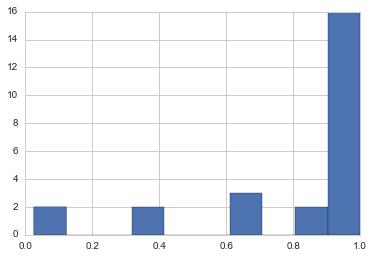

In [49]:
plt.hist(dframe3.Value,bins=10)

In [71]:
fileIN = open("/users/michaelbinkley/desktop/GTEx/eQTLQTLtools.txt")


print(fileIN.readline())
#print(fileIN.readline())

In [92]:
fileIN = open("/users/michaelbinkley/desktop/qtltools_test/genes.50percent.chr22.bed")

print(fileIN.readline())
print(fileIN.readline())
print(fileIN.readline())
print(fileIN.readline())
print(fileIN.readline())
print(fileIN.readline())

#chr	start	end	gene	length	strand	HG00096	HG00097	HG00099	HG00100	HG00101	HG00102	HG00103	HG00105	HG00106	HG00108	HG00109	HG00110	HG00111	HG00112	HG00114	HG00115	HG00116	HG00117	HG00118	HG00119	HG00120	HG00121	HG00122	HG00123	HG00125	HG00126	HG00127	HG00128	HG00129	HG00130	HG00131	HG00132	HG00133	HG00136	HG00137	HG00138	HG00139	HG00141	HG00142	HG00143	HG00145	HG00146	HG00148	HG00149	HG00150	HG00151	HG00154	HG00155	HG00157	HG00158	HG00159	HG00160	HG00171	HG00173	HG00174	HG00176	HG00177	HG00178	HG00179	HG00180	HG00181	HG00182	HG00183	HG00185	HG00186	HG00187	HG00188	HG00189	HG00231	HG00232	HG00233	HG00234	HG00235	HG00236	HG00238	HG00239	HG00240	HG00242	HG00243	HG00244	HG00245	HG00246	HG00250	HG00251	HG00252	HG00253	HG00255	HG00256	HG00257	HG00258	HG00259	HG00260	HG00261	HG00262	HG00263	HG00264	HG00265	HG00266	HG00267	HG00268	HG00269	HG00271	HG00272	HG00273	HG00274	HG00275	HG00276	HG00277	HG00278	HG00280	HG00281	HG00282	HG00284	HG00285	HG00306	HG00308	HG00309	HG00310	HG00311	HG00313	HG0031

In [5]:
def filter_plink_output(outfilename, paramDict):
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/plink.tags')
    fileOUT = open(outfilename, "w") 
    pos = filter_genov_output(paramDict["gtexDir"] + "filteredSNPs.txt", paramDict)
    for i in fileIN: 
        i = i.rstrip().split('\t') 
        var = str(i[0])

            
        if var in pos: 
            fileOUT.write(str(var) + "\n")

        else: 
            continue

    fileOUT.close()
    fileIN.close()
filter_plink_output(paramDict["gtexDir"] + "filteredplink.txt", paramDict) 

In [159]:
### RUn this for the real eQTL, this does not use residuals or calculate residuals.
import load_params as LP
import eqtl_funcs as EF

geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"
#22_40407887_G_A_b37

expV2, indivVector2 = EF.get_eqtl_stats_real(chrNum, pos, geneName, tissue, paramDict)  

#print(slope)
#print(intercept)
#print(residuals)
print(expV2)

def output_gene_info(geneName, paramDict):
    
    fileIN = open(paramDict["tmpDir"] + '/chrname.txt')
    selected = list()
    for i in fileIN: 
        i = i.rstrip().split('\t')
        
        if i[3]== geneName:
            selected = i
            break
            
    return selected

  
def output_header2(indivVector2): 

            
            
    header = "\t".join(['#chr',  'start', 'end' , 'gene' , 'length' , 'strand'] + [str(x) for x in indivVector2] )
    return header

    fileIN.close()

def output_bed(indivVector2, expV2, filepath, geneName, paramDict):
    selected = output_gene_info(geneName, paramDict)
    header = output_header2(indivVector2)
    with open(filepath, 'w') as outfile:
        outfile.write(header + "\n")
        geneLocation = selected
        outfile.write("\t".join([str(x) for x in geneLocation]) + "\t" + "\t".join([str(x) for x in expV2]) + "\n")
print(geneName)        
output_bed(indivVector2, expV2, paramDict["tmpSmall"] + "/GTExExpfile_realeQTL.bed", geneName, paramDict)





	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
[0.6620541667499952, 0.1901311651846145, -0.43072729929545756, -0.712443032389489, -0.5312607573635746, 1.2418667918433206, -0.06968492031845568, -1.332975991985993, -0.6013317483706249, 0.21042839424792484, 0.6132931230857989, 1.4949762716640178, -0.2718800053992609, 1.2636680250691246, 2.147593883556041, 0.5312607573635744, 0.4637077514571792, 0.16991197283324513, -0.452659911230046, 0.24104039388602685, 0.41983885990487646, 0.2512933688732672, -1.8557299227201098, 0.029845242919239425, 0.23081269611355665, 0.33437680758881416, 0.07965966955253276, -1.1999500758833568, 0.28221614706250825, -0.12967268178277752, -0.3982089211336604, -0.890838396496015, -0.22060908646341357, 0.8053202128239452, -0.20026946614337313, 0.04975520920829814, -0.463707751457179, 1.1797611176118612, 1.4367337867138037, -0.9516592123227108, 0.6744897501960817, -1.1219004674623523, 0.06968492031845568, -0.44166

In [13]:
##not sure we even need to index the PP file

import os

os.system("bgzip /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile_realeQTL.bed")
os.system("tabix -p bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile_realeQTL.bed.gz")



0

In [52]:
import os


os.system("QTLtools rtc --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf.gz --bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile_realeQTL.bed.gz --hotspot /users/michaelbinkley/desktop/qtltools_test/hotspots.bed --gwas-cis /users/michaelbinkley/desktop/RTCstuffs/bestGWAS_var.txt /users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations_real.txt --normal --out rtc_results_realeQTL.txt")



0

In [31]:
def prep_real_GWAS(outfilename):
    fileIN = open("bestGWAS.txt")
    fileOUT = open(outfilename, "w")
    for i in fileIN:
        i=i.rstrip().split("\t")
        varG = str(i[3]) 
        
        fileOUT.write(str(varG) + "\t" + "Cancer" "\n")

    fileOUT.close()
    fileIN.close()
#prep_real_GWAS("bestGWAS_var.txt")

def prep_real_eQTL(outfilename):
    fileIN = open("/users/michaelbinkley/desktop/RTCstuffs/besteQTLs.txt" )
    fileOUT = open(outfilename, "w")
    for i in fileIN:
        i=i.rstrip().split("\t")
        varG = str(i[0])
        fileOUT.write(str(varG) + "\n")

    fileOUT.close()
    fileIN.close()
#prep_real_eQTL("besteQTL_var.txt")

In [32]:
def prepare_perm_file(outfilename):  
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed')
    causalvar = open("besteQTL_var.txt")
    fileIN.readline()
    fileOUT = open(outfilename, "w")
    for j in causalvar: 
        j = j.rstrip().split('\t')
        cvar = j[0]
    for i in fileIN: 
        i = i.rstrip().split('\t')
        gene = i[3]
        chrn = i[0]
        start = i[1]
        end = i[2]
        dist = i[4]
        sense = i[5]
        
        fileOUT.write("\t".join([ str(gene), str(chrn),  str(start) , str(end), sense, dist, dist, str(cvar), chrn , 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA' ] ) + "\n")

    fileIN.close()
    fileOUT.close()

    
#prepare_perm_file( "/users/michaelbinkley/desktop/RTCstuffs/tmpSmall/permutations_real.txt")
  

In [130]:
# Script to filter a vcf file for SNPs with ANY missing genotypes. 
# Perhaps too stringent of a filter, but will edit out later. 
def fix_vcf():
    vcf_file_path_unzipped= ""
    new_vcf_file_path_unzipped = ""
    fileOUT = open(paramDict["gtexDir"] +'/chr22_subset_gtex_copy2.vcf', "w")

    fileIN = open(paramDict["gtexDir"] +'/chr22_subset_gtex_copy.vcf')
    for i in fileIN:
        if i[0]=="#": fileOUT.write(i)
        else:
            isplit = i.rstrip().split('\t')
            genotypes = isplit[9:]
            genotypes_with_missing = [x for x in genotypes if "." in x.split('/') ]
            if len(genotypes_with_missing)>0: continue
            else:
                fileOUT.write(i)
fix_vcf()

In [3]:
#### This step outputs the cold spots and returns the hotspots with the chr removed
def ID_hotspots(outfilename): 
    fileIN = open('/users/michaelbinkley/desktop/hotspots_b37_hg19.bed')
    hotspots = list()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')

        
        Chr = i[0]
        for num in i[0]: #Get rid of "chr in the file"
            if num in "chr":
                Chr = Chr.replace(num, '')       
        start = int(i[1])
        end = int(i[2])
        dist = str(i[3])

        hotspots.append([Chr, start, end, dist])
        #hotspots.append(start)
        #hotspots.append(end)
        #hotspots.append(middle)
        fileOUT.write(Chr + "\t" + str(start) + "\t" + str(end) + "\t" + str(dist)    + "\n")
    fileIN.close()
    fileOUT.close()
    return hotspots
#ID_hotspots(paramDict["gtexDir"] + 'hotspots.bed')

In [ ]:

def filter_vcf_1(outfilename): 
    fileIN = open(paramDict["gtexDir"] +'/chr22_subset_gtex_copy2.vcf')
    
    #selectedcoldspots2 = output_selected_coldspots('preVCF.txt')
    selectedcoldspots2 = find_variant_coldspot('eQTLcoldspot.txt')
    fileOUT = open(outfilename, "w")
    
    for i in fileIN:
        line= fileIN.readline()
        if line[0]=="#":
            continue
      

        i = i.rstrip().split('\t')
        if i[1]=="POS":
            continue      
        chrnum = str(i[0])
        #print(i[1])
        position = float(i[1])

        for  Chr, end, bound in selectedcoldspots2:
            if (Chr)  == chrnum:
                if position > end  and position < bound:  

                    fileOUT.write("\t".join([str(x) for x in i] ) + "\n")                    
                else: 
                    continue
      
    fileIN.close()
    fileOUT.close()
#filter_vcf_1('filteredgenotype.vcf')